# Introduction

## Abstract

**Decision Tree Project**

In this project, a Decision Tree model has been implemented to address a specific problem. The Decision Tree model is a machine learning algorithm that proves highly effective in decision-making and classification tasks.

## About the Author
**Mahdi Asadolahzade**

- **Background:** Computer Sciense Student in IUST
- **Contact:** mahdiasadi140@gmail.com

Feel free to reach out if you have any questions or feedback related to this project. I'm open to collaboration and discussions 

# Analysis Dataset

## Overview
In this section, we will perform a detailed analysis of the dataset and prepare it for building the Decision Tree model. The dataset is focused on bank customers, and our goal is to classify them based on key features and predict whether they will make long-term deposits.

## Reading Dataset

using pandas library 

In [1]:
import pandas as pd

read data set using pandas

In [2]:
file_path = "./data.csv" 
df = pd.read_csv(file_path)

## Initial Data Exploration

Let's start by conducting an initial exploration of the dataset to better understand its structure and content :

**Display the shape of the DataFrame**

In [3]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (45211, 18)


**Display data types of each column**

In [4]:
print("Data Types:\n", df.dtypes)

Data Types:
 Id             int64
age          float64
job           object
marital       object
education     object
default       object
balance      float64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
dtype: object


**Display summary statistics**

In [5]:
print("Summary Statistics:\n", df.describe())

Summary Statistics:
                  Id           age        balance           day      duration  \
count  45211.000000  45202.000000   45208.000000  45211.000000  45211.000000   
mean   23606.000000     40.954714    1362.346620     15.806419    258.163080   
std    13051.435847     11.539144    3044.852387      8.322476    257.527812   
min     1001.000000     -1.000000   -8019.000000      1.000000      0.000000   
25%    12303.500000     33.000000      72.000000      8.000000    103.000000   
50%    23606.000000     39.000000     448.000000     16.000000    180.000000   
75%    34908.500000     48.000000    1428.000000     21.000000    319.000000   
max    46211.000000    999.000000  102127.000000     31.000000   4918.000000   

           campaign         pdays      previous  
count  45211.000000  45211.000000  45211.000000  
mean       2.763841     40.197828      0.580323  
std        3.098021    100.128746      2.303441  
min        1.000000     -1.000000      0.000000  
25%     

**Display the first few rows of the DataFrame**

In [6]:
print("Head of the DataFrame:\n", df.head())

Head of the DataFrame:
      Id    age           job  marital  education default  balance housing  \
0  1001  999.0    management  married   tertiary      no   2143.0     yes   
1  1002   44.0    technician   single  secondary      no     29.0     yes   
2  1003   33.0  entrepreneur  married  secondary      no      2.0     yes   
3  1004   47.0   blue-collar  married    unknown      no   1506.0     yes   
4  1005   33.0       unknown   single    unknown      no      1.0      no   

  loan  contact  day month  duration  campaign  pdays  previous poutcome   y  
0   no  unknown    5   may       261         1     -1         0  unknown  no  
1   no  unknown    5   may       151         1     -1         0  unknown  no  
2  yes  unknown    5   may        76         1     -1         0  unknown  no  
3   no  unknown    5   may        92         1     -1         0  unknown  no  
4   no  unknown    5   may       198         1     -1         0  unknown  no  


## Pre Processing

first we copy the main dataFrame

In [7]:
copydf = df.copy()

then ipmort necessary libraries

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

### ID

Check IDs that are repeated

In [9]:
unique_id_count = copydf['Id'].nunique()
print("Number of unique Id values:", unique_id_count)


Number of unique Id values: 45211


Check for missing or invalid information

In [10]:
missing_id_values = copydf['Id'].isnull().sum()
print("Number of missing or invalid Id values:", missing_id_values)


Number of missing or invalid Id values: 0


**There seems to be no problem with this**

### age

**Checking for missing values:**

In [11]:
missing_age_values = copydf['age'].isnull().sum()
print("Number of missing age values:", missing_age_values)


Number of missing age values: 9


**Invalid or out of range values**

In [12]:
invalid_age_values = copydf[(copydf['age'] < 0) | (copydf['age'] > 120)]
print("Invalid or out-of-range age values:\n", invalid_age_values)


Invalid or out-of-range age values:
           Id    age         job  marital  education default  balance housing  \
0       1001  999.0  management  married   tertiary      no   2143.0     yes   
45203  46204   -1.0     student   single   tertiary      no    113.0      no   
45204  46205   -1.0     retired  married  secondary      no   2850.0      no   
45205  46206   -1.0  technician   single  secondary      no    505.0      no   

      loan   contact  day month  duration  campaign  pdays  previous poutcome  \
0       no   unknown    5   may       261         1     -1         0  unknown   
45203   no  cellular   17   nov       266         1     -1         0  unknown   
45204   no  cellular   17   nov       300         1     40         8  failure   
45205  yes  cellular   17   nov       386         2     -1         0  unknown   

         y  
0       no  
45203  yes  
45204  yes  
45205  yes  


In [13]:
copydf = copydf[(copydf['age'] >= 0) & (copydf['age'] <= 120)]

**Check the age distribution**

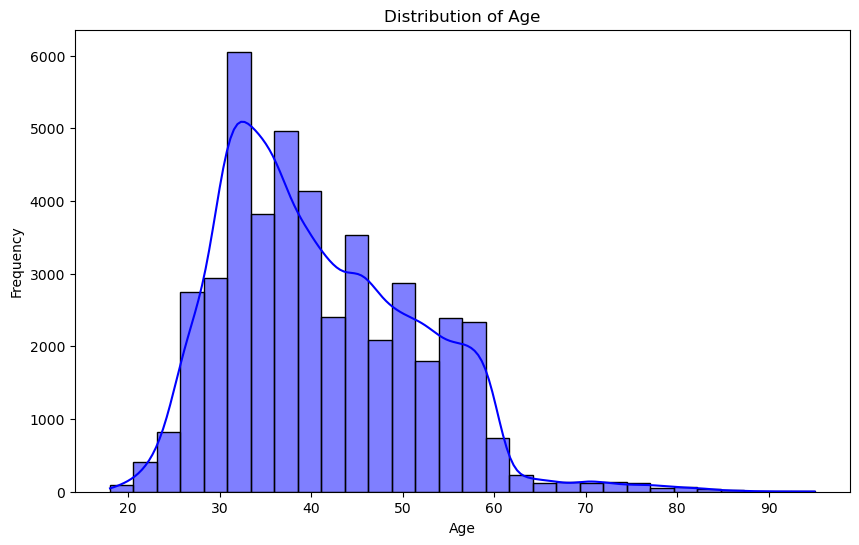

In [14]:


plt.figure(figsize=(10, 6))
sns.histplot(copydf['age'], bins=30, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


This age distribution chart will help us get a better understanding of the age distribution in the data.
so for missing data section :

As you can see in the photo, the distribution is in the form of an average, and we can use the average age to fill in the missing values

In [15]:
mean_age = copydf['age'].mean()
copydf['age'].fillna(mean_age, inplace=True)

### job

**Checking for missing values:**

In [16]:
missing_job_values = copydf['job'].isnull().sum()
print("Number of missing job values:", missing_job_values)


Number of missing job values: 0


**Number of categories and feature distribution**

In [17]:
job_distribution = copydf['job'].value_counts()
print("Distribution of job categories:\n", job_distribution)


Distribution of job categories:
 job
blue-collar      9730
management       9456
technician       7595
admin.           5169
services         4153
retired          2263
self-employed    1579
entrepreneur     1485
unemployed       1303
housemaid        1240
student           937
unknown           288
Name: count, dtype: int64


Display the distribution of the number of people by occupation:

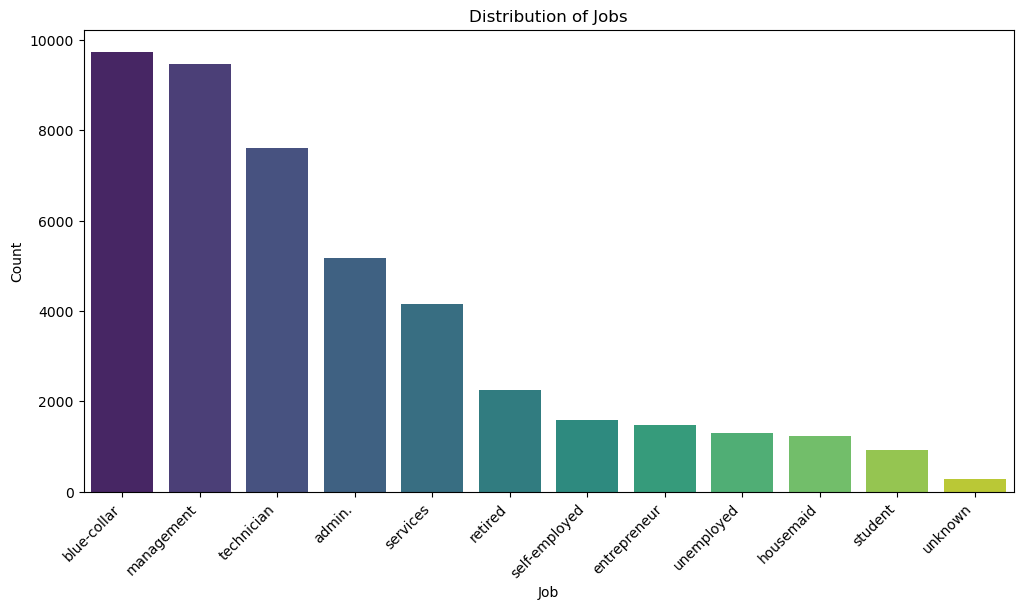

In [18]:


job_distribution = copydf['job'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=job_distribution.index, y=job_distribution.values, palette='viridis')
plt.title('Distribution of Jobs')
plt.xlabel('Job')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


it seems job disturbution is alright !

### marital

**Checking for missing values:**

In [19]:
missing_marital_values = copydf['marital'].isnull().sum()
print("Number of missing marital values:", missing_marital_values)


Number of missing marital values: 0


**Checking the distribution of marital status**

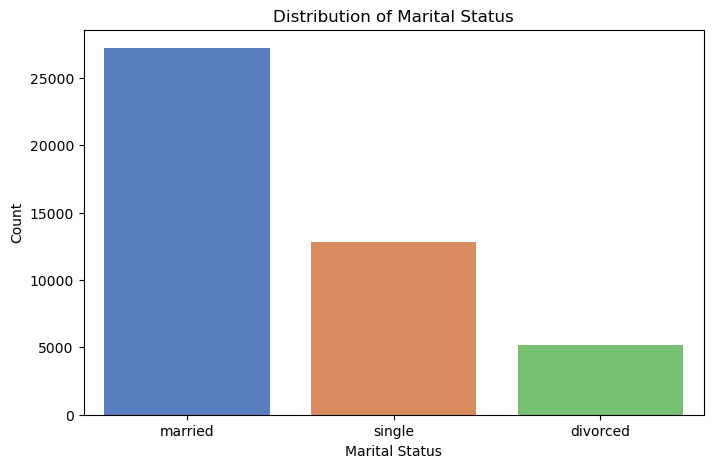

In [20]:

marital_distribution = copydf['marital'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=marital_distribution.index, y=marital_distribution.values, palette='muted')
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()


### education

**Checking for missing values:**

In [21]:
missing_education_values = copydf['education'].isnull().sum()
print("Number of missing education values:", missing_education_values)


Number of missing education values: 0


**Examining the distribution of education level:**

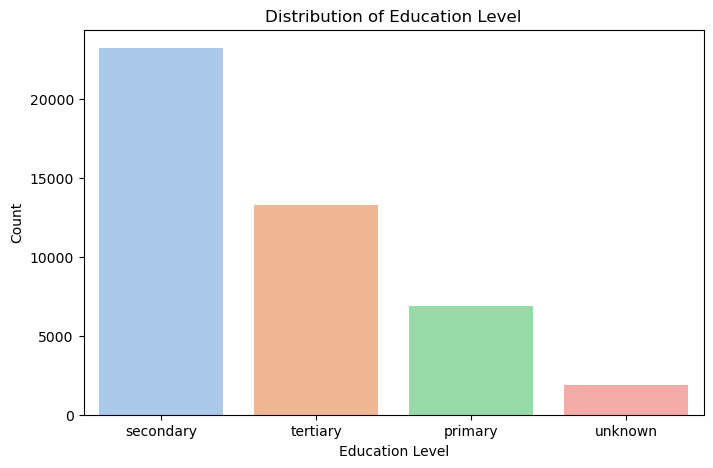

In [22]:

education_distribution = copydf['education'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=education_distribution.index, y=education_distribution.values, palette='pastel')
plt.title('Distribution of Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()


### default

**Checking for missing values:**

In [23]:
missing_default_values = copydf['default'].isnull().sum()
print("Number of missing default values:", missing_default_values)


Number of missing default values: 0


**Checking the distribution of the default status:**

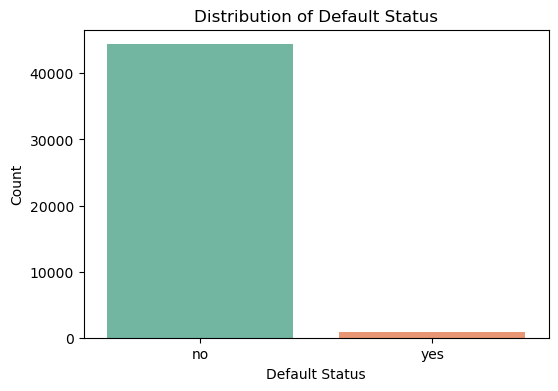

In [24]:


default_distribution = copydf['default'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=default_distribution.index, y=default_distribution.values, palette='Set2')
plt.title('Distribution of Default Status')
plt.xlabel('Default Status')
plt.ylabel('Count')
plt.show()


Converting the "default" property to binary (as 0 and 1) is usually useful in modeling. This transformation simplifies the input to the model and may help improve model performance

In [25]:

copydf['default'] = copydf['default'].replace({'yes': 1, 'no': 0})

### balance

**Checking for missing values:**

In [26]:
missing_balance_values = copydf['balance'].isnull().sum()
print("Number of missing balance values:", missing_balance_values)


Number of missing balance values: 2


**Examining descriptive statistics related to account balance**

In [27]:
balance_stats = copydf['balance'].describe()
print("Descriptive Statistics for Balance:\n", balance_stats)


Descriptive Statistics for Balance:
 count     45196.000000
mean       1362.562129
std        3045.192527
min       -8019.000000
25%          72.000000
50%         449.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64


The account value should not be negative, so we remove the negative values

In [28]:

copydf['balance'] = copydf['balance'].apply(lambda x: max(x, 0))


**Checking the account balance distribution:**

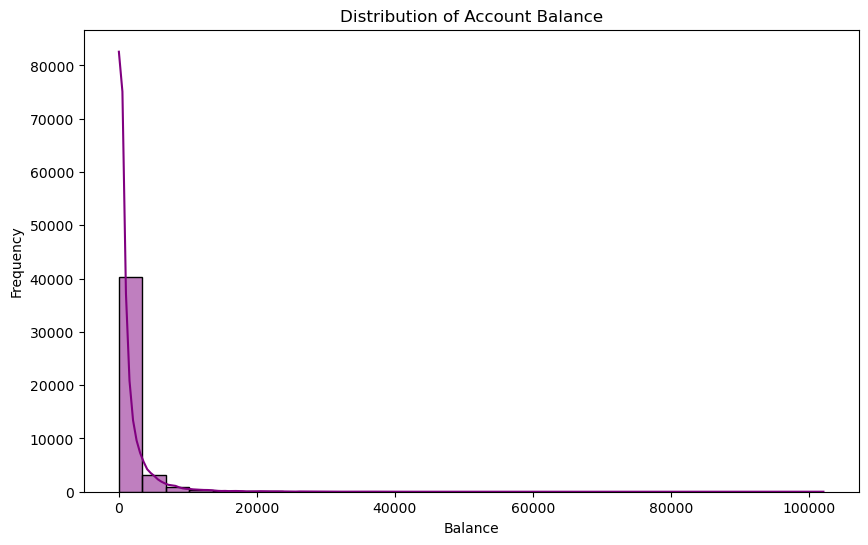

In [29]:


plt.figure(figsize=(10, 6))
sns.histplot(copydf['balance'], bins=30, kde=True, color='purple')
plt.title('Distribution of Account Balance')
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.show()


for missing data section we use mean 

In [30]:

mean_balance = copydf['balance'].mean()
copydf['balance'].fillna(mean_balance, inplace=True)


### housing

**Checking for missing values:**

In [31]:
missing_housing_values = copydf['housing'].isnull().sum()
print("Number of missing housing values:", missing_housing_values)


Number of missing housing values: 0


**Checking the distribution of values:**

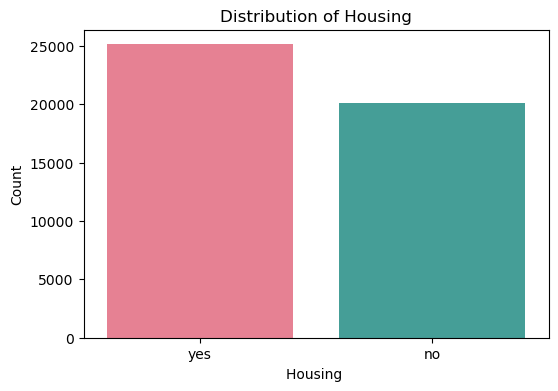

In [32]:


housing_distribution = copydf['housing'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=housing_distribution.index, y=housing_distribution.values, palette='husl')
plt.title('Distribution of Housing')
plt.xlabel('Housing ')
plt.ylabel('Count')
plt.show()


Because it is yes and no, it is better to convert it into binary zero and one 

In [33]:
copydf['housing'] = copydf['housing'].replace({'yes': 1, 'no': 0})

### loan

**Checking for missing values:**

In [34]:
missing_loan_values = copydf['loan'].isnull().sum()
print("Number of missing loan values:", missing_loan_values)


Number of missing loan values: 0


**Checking the distribution of values:**

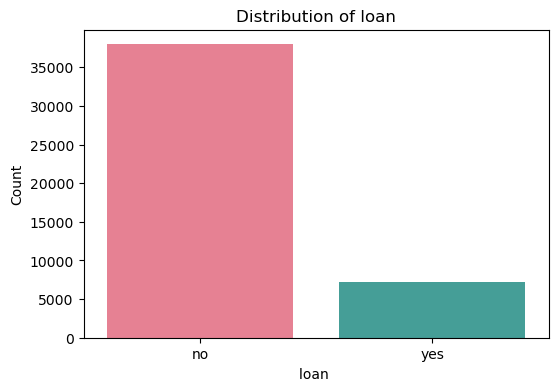

In [35]:


loan_distribution = copydf['loan'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=loan_distribution.index, y=loan_distribution.values, palette='husl')
plt.title('Distribution of loan')
plt.xlabel('loan ')
plt.ylabel('Count')
plt.show()


Because it is yes and no, it is better to convert it into binary zero and one too

In [36]:
copydf['loan'] = copydf['loan'].replace({'yes': 1, 'no': 0})

### contact

**Checking for missing values:**

In [37]:
missing_contact_values = copydf['contact'].isnull().sum()
print("Number of missing contact values:", missing_contact_values)


Number of missing contact values: 0


**Checking the distribution of values:**

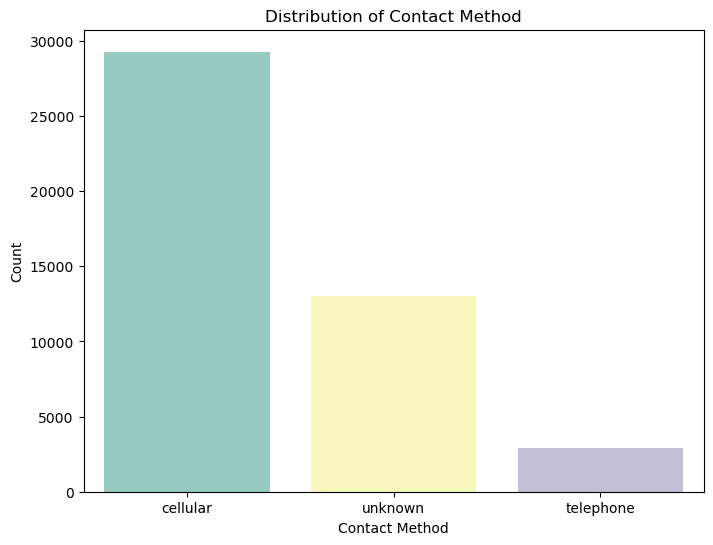

In [38]:


contact_distribution = copydf['contact'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=contact_distribution.index, y=contact_distribution.values, palette='Set3')
plt.title('Distribution of Contact Method')
plt.xlabel('Contact Method')
plt.ylabel('Count')
plt.show()


### day and month

**Checking for missing values:**

In [39]:
missing_day_values = copydf['day'].isnull().sum()
print("Number of missing day values:", missing_day_values)


Number of missing day values: 0


In [40]:
missing_month_values = copydf['month'].isnull().sum()
print("Number of missing month values:", missing_month_values)


Number of missing month values: 0


**Checking the distribution of values:**

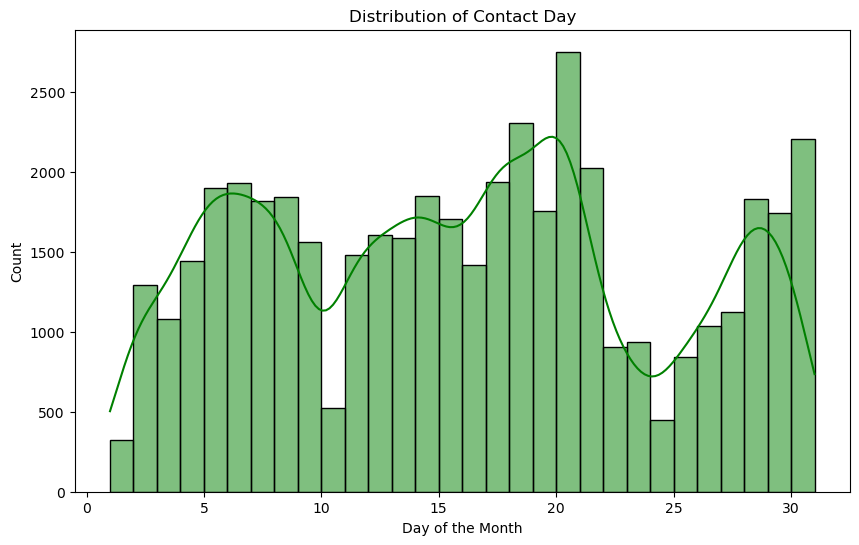

In [41]:

plt.figure(figsize=(10, 6))
sns.histplot(copydf['day'], bins=30, kde=True, color='green')
plt.title('Distribution of Contact Day')
plt.xlabel('Day of the Month')
plt.ylabel('Count')
plt.show()


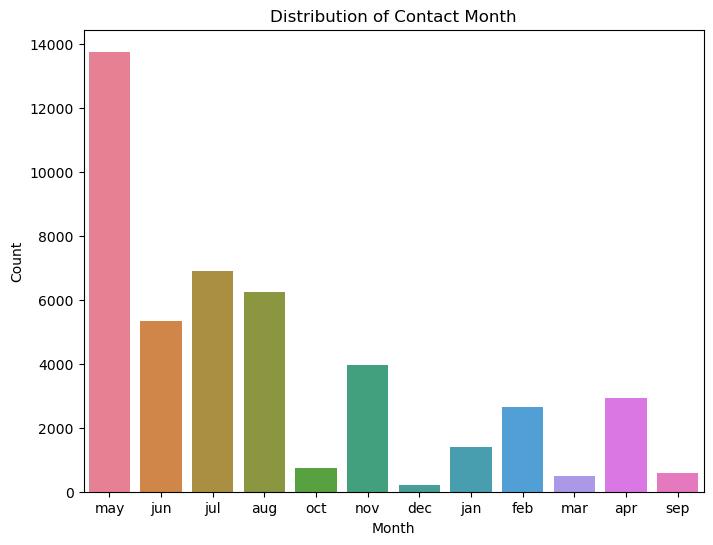

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(x='month', data=copydf, palette='husl')
plt.title('Distribution of Contact Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()


### duration

**Checking for missing values:**

In [43]:
missing_duration_values = copydf['duration'].isnull().sum()
print("Number of missing duration values:", missing_duration_values)


Number of missing duration values: 0


**Checking the distribution of values:**

In [44]:
print(copydf['duration'].describe())

count    45198.000000
mean       258.128546
std        257.446867
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64


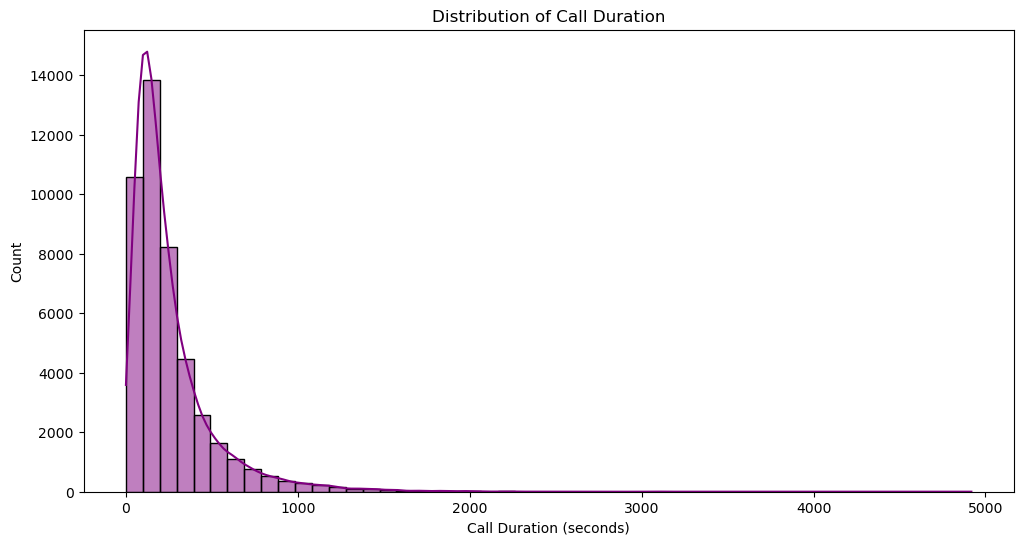

In [45]:


plt.figure(figsize=(12, 6))
sns.histplot(copydf['duration'], bins=50, kde=True, color='purple')
plt.title('Distribution of Call Duration')
plt.xlabel('Call Duration (seconds)')
plt.ylabel('Count')
plt.show()


### campaign

**Checking for missing values:**

In [46]:
missing_campaign_values = copydf['campaign'].isnull().sum()
print("Number of missing campaign values:", missing_campaign_values)


Number of missing campaign values: 0


**Checking the distribution of values:**

In [47]:
print(copydf['campaign'].describe())

count    45198.000000
mean         2.764326
std          3.098331
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64


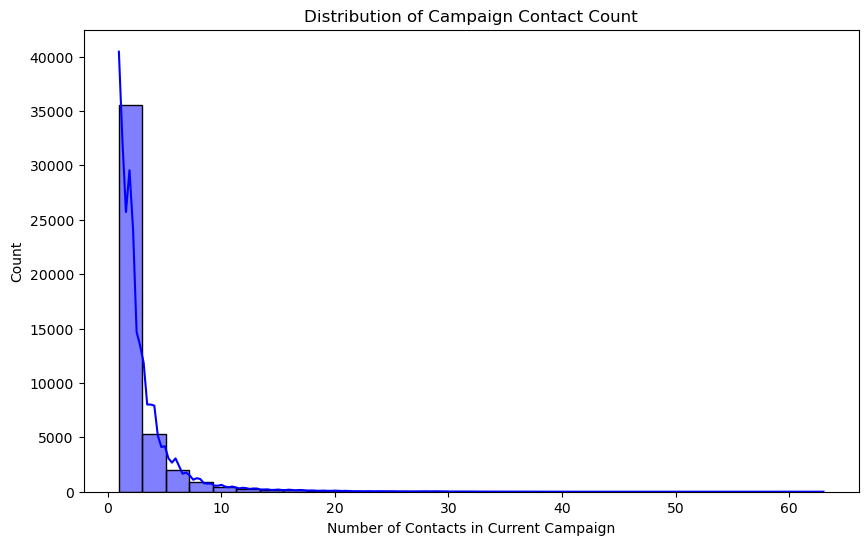

In [48]:


plt.figure(figsize=(10, 6))
sns.histplot(copydf['campaign'], bins=30, kde=True, color='blue')
plt.title('Distribution of Campaign Contact Count')
plt.xlabel('Number of Contacts in Current Campaign')
plt.ylabel('Count')
plt.show()


### pdays , previous

**Checking for missing values:**

In [49]:
missing_pdays_values = copydf['pdays'].isnull().sum()
print("Number of missing pdays values:", missing_pdays_values)


Number of missing pdays values: 0


In [50]:
missing_previous_values = copydf['previous'].isnull().sum()
print("Number of missing previous values:", missing_previous_values)


Number of missing previous values: 0


**Checking the distribution of values:**

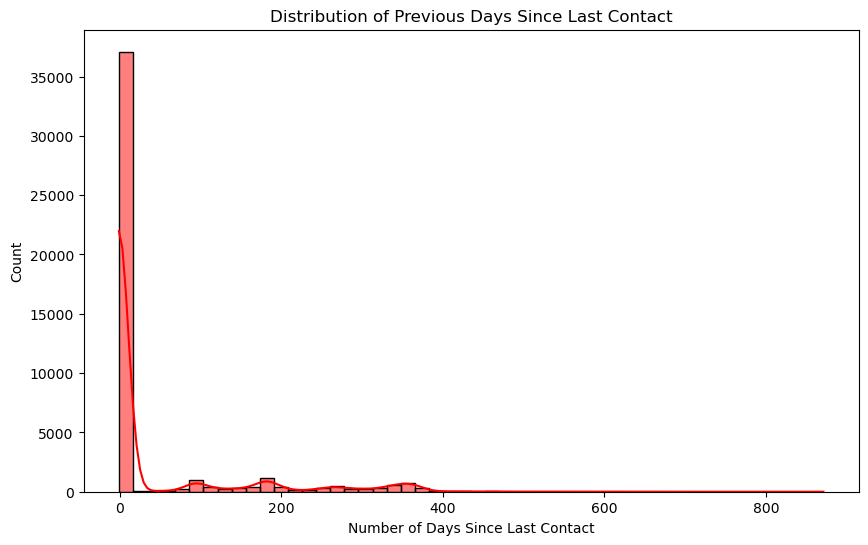

In [51]:


plt.figure(figsize=(10, 6))
sns.histplot(copydf['pdays'], bins=50, kde=True, color='red')
plt.title('Distribution of Previous Days Since Last Contact')
plt.xlabel('Number of Days Since Last Contact')
plt.ylabel('Count')
plt.show()


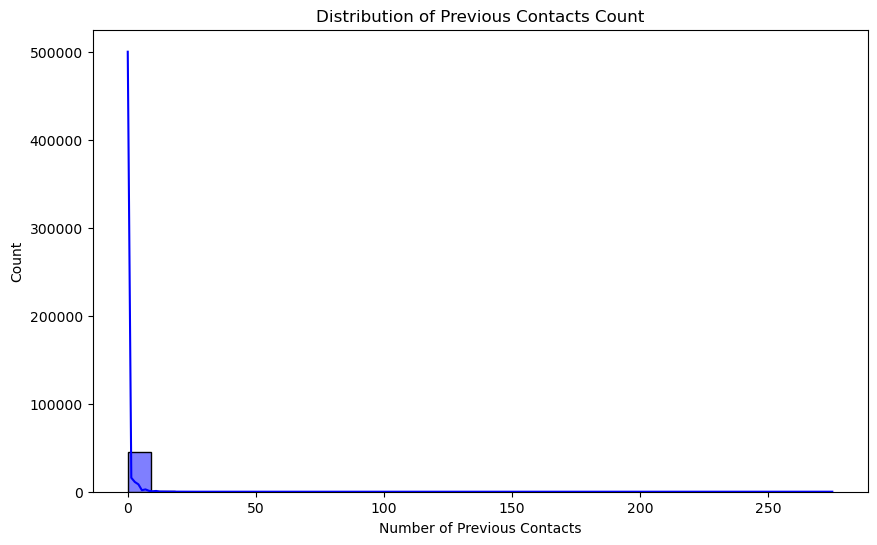

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(copydf['previous'], bins=30, kde=True, color='blue')
plt.title('Distribution of Previous Contacts Count')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Count')
plt.show()


### poutcome

**Checking for missing values:**

In [53]:
missing_poutcome_values = copydf['poutcome'].isnull().sum()
print("Number of missing poutcome values:", missing_poutcome_values)


Number of missing poutcome values: 0


**Checking the distribution of values:**

In [54]:
print(copydf['poutcome'].value_counts())

poutcome
unknown    36947
failure     4900
other       1840
success     1511
Name: count, dtype: int64


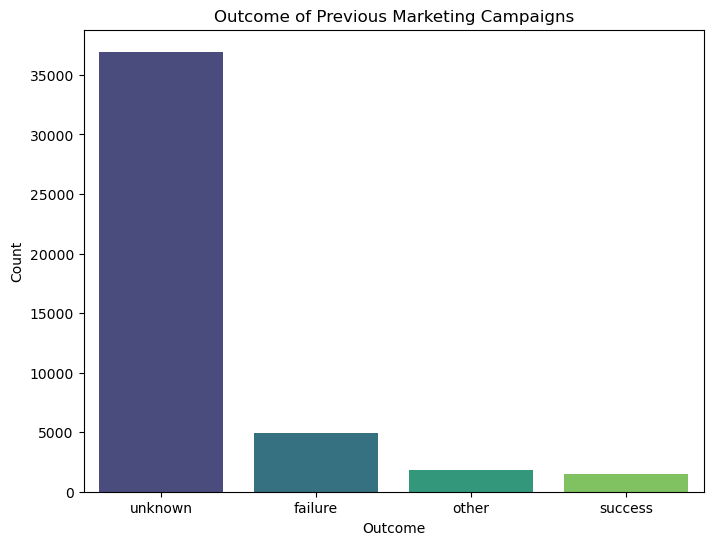

In [55]:
plt.figure(figsize=(8, 6))
sns.countplot(x='poutcome', data=copydf, palette='viridis')
plt.title('Outcome of Previous Marketing Campaigns')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()


### y

**Checking for missing values:**

In [56]:
missing_y_values = copydf['y'].isnull().sum()
print("Number of missing y values:", missing_y_values)


Number of missing y values: 0


**Checking the distribution of values:**

In [58]:
print(copydf['y'].value_counts())

y
0    39912
1     5286
Name: count, dtype: int64


In [57]:
copydf['y'] = copydf['y'].replace({'yes': 1, 'no': 0})

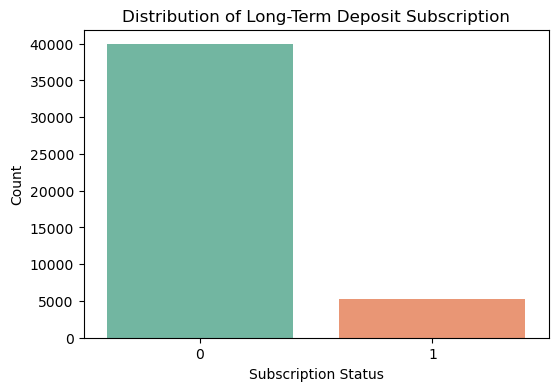

In [59]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=copydf, palette='Set2')
plt.title('Distribution of Long-Term Deposit Subscription')
plt.xlabel('Subscription Status')
plt.ylabel('Count')
plt.show()


## Final Processed Dataset

In [60]:
print(copydf.info())

<class 'pandas.core.frame.DataFrame'>
Index: 45198 entries, 1 to 45210
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Id         45198 non-null  int64  
 1   age        45198 non-null  float64
 2   job        45198 non-null  object 
 3   marital    45198 non-null  object 
 4   education  45198 non-null  object 
 5   default    45198 non-null  int64  
 6   balance    45198 non-null  float64
 7   housing    45198 non-null  int64  
 8   loan       45198 non-null  int64  
 9   contact    45198 non-null  object 
 10  day        45198 non-null  int64  
 11  month      45198 non-null  object 
 12  duration   45198 non-null  int64  
 13  campaign   45198 non-null  int64  
 14  pdays      45198 non-null  int64  
 15  previous   45198 non-null  int64  
 16  poutcome   45198 non-null  object 
 17  y          45198 non-null  int64  
dtypes: float64(2), int64(10), object(6)
memory usage: 6.6+ MB
None


# Implementation of decision tree

## Node Class

The `Node` class represents a node in the decision tree. Each node contains information about the feature to split on, the threshold value for the split, references to the left and right child nodes, and a value if the node is a leaf node.

### Code

In [61]:
class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
        self.feature_index = feature_index  # Index of feature to split on
        self.threshold = threshold          # Threshold value for feature split
        self.left = left                    # Left child node
        self.right = right                  # Right child node
        self.value = value                  # Value if node is a leaf node


## DecisionTree Class

### Constructor
- `max_depth`: Maximum depth of the tree.
- `min_samples_split`: Minimum samples required to split a node.

### fit Method
The `fit` method is used to train the decision tree classifier.
- Parameters:
  - `X`: Feature matrix.
  - `y`: Target labels.
  - `impurity`: Impurity measure to use for splitting, default is 'gini'.

### _grow_tree Method
The `_grow_tree` method recursively grows the decision tree by splitting nodes based on impurity measure.
- Parameters:
  - `X`: Feature matrix.
  - `y`: Target labels.
  - `depth`: Current depth of the tree.
  - `impurity`: Impurity measure to use for splitting.

### predict Method
The `predict` method predicts the target labels for input features.
- Parameters:
  - `X`: Feature matrix.
- Returns:
  - Predicted target labels.

### _predict Method
The `_predict` method recursively traverses the decision tree to predict target labels for input features.
- Parameters:
  - `x`: Input feature vector.
  - `tree`: Current node in the decision tree.
- Returns:
  - Predicted target label.

### _gini_impurity Method
The `_gini_impurity` method calculates the Gini impurity measure for a split.
- Parameters:
  - `left_y`: Target labels of the left child node.
  - `right_y`: Target labels of the right child node.
- Returns:
  - Gini impurity value.

### _entropy Method
The `_entropy` method calculates the entropy impurity measure for a split.
- Parameters:
  - `left_y`: Target labels of the left child node.
  - `right_y`: Target labels of the right child node.
- Returns:
  - Entropy impurity value.

### Entropy vs. Gini Index in Decision Trees

In decision tree algorithms, two commonly used impurity indices for evaluating the quality of splits are **Entropy** and **Gini Index**. These indices help the algorithm determine the optimal feature and value combination to split the dataset.

#### Entropy (H)

Entropy is a measure of impurity or disorder in a set of data. For a given dataset with multiple classes, the entropy is calculated using the formula:

$$ H(S) = - \sum_{i=1}^{c} P_i \cdot \log_2(P_i) $$

- $H(S)$ is the entropy of the dataset.
- $c$ is the number of classes.
- $P_i$ is the proportion of instances belonging to class $i$.

Entropy ranges from 0 (pure dataset, all instances belong to a single class) to 1 (maximum impurity, instances are evenly distributed among classes).

#### Gini Index (G)

The Gini Index is another measure of impurity that evaluates how often a randomly chosen element would be incorrectly classified. For a given dataset, the Gini Index is calculated using the formula:

$$ G(S) = 1 - \sum_{i=1}^{c} P_i^2 $$

- $G(S)$ is the Gini Index of the dataset.
- $c$ is the number of classes.
- $P_i$ is the proportion of instances belonging to class $i$.

Similar to entropy, the Gini Index ranges from 0 (pure dataset) to 1 (maximum impurity).

#### Differences

- **Interpretation**: Entropy measures the uncertainty or disorder in the dataset, while the Gini Index measures the probability of misclassification.
  
- **Output Range**: Entropy has a range between 0 and 1, while the Gini Index also has a range between 0 and 1.

- **Computation**: Entropy involves the logarithm, making it computationally more intensive than the Gini Index, which only requires squared terms.

- **Sensitivity**: Entropy is slightly more sensitive to changes in class probabilities compared to the Gini Index.

Both entropy and the Gini Index are widely used in decision tree algorithms, and the choice between them often depends on the specific characteristics of the dataset and the desired properties of the resulting tree.


### Code

In [62]:
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth                # Maximum depth of the tree
        self.min_samples_split = min_samples_split  # Minimum samples required to split a node

    def fit(self, X, y, impurity='gini'):
        self.num_classes = len(set(y))
        self.num_features = X.shape[1]
        self.tree = self._grow_tree(X, y, impurity=impurity)

    def _grow_tree(self, X, y, depth=0, impurity='gini'):
        num_samples_per_class = [np.sum(y == i) for i in range(self.num_classes)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(value=predicted_class)

        # Split recursively until maximum depth or minimum samples reached
        if depth < self.max_depth and X.shape[0] >= self.min_samples_split:
            best_criteria = None
            best_sets = None

            for feature_index in range(self.num_features):
                thresholds = np.unique(X[:, feature_index])

                for threshold in thresholds:
                    left_indices = np.where(X[:, feature_index] <= threshold)[0]
                    right_indices = np.where(X[:, feature_index] > threshold)[0]
                    if len(left_indices) > 0 and len(right_indices) > 0:
                        if impurity == 'gini':
                            impurity_val = self._gini_impurity(y[left_indices], y[right_indices])
                        elif impurity == 'entropy':
                            impurity_val = self._entropy(y[left_indices], y[right_indices])
                        else:
                            raise ValueError("Invalid impurity parameter. Choose 'gini' or 'entropy'.")

                        if best_criteria is None or impurity_val < best_criteria:
                            best_criteria = impurity_val
                            best_sets = {
                                'left_indices': left_indices,
                                'right_indices': right_indices,
                                'feature_index': feature_index,
                                'threshold': threshold
                            }

            if best_criteria is not None:
                left = self._grow_tree(X[best_sets['left_indices'], :], y[best_sets['left_indices']], depth + 1, impurity=impurity)
                right = self._grow_tree(X[best_sets['right_indices'], :], y[best_sets['right_indices']], depth + 1, impurity=impurity)
                node = Node(feature_index=best_sets['feature_index'], threshold=best_sets['threshold'], left=left, right=right)

        return node

    def predict(self, X):
        return np.array([self._predict(x, self.tree) for x in X])

    def _predict(self, x, tree):
        if tree.value is not None:
            return tree.value
        feature_value = x[tree.feature_index]
        if feature_value <= tree.threshold:
            return self._predict(x, tree.left)
        else:
            return self._predict(x, tree.right)

    def _gini_impurity(self, left_y, right_y):
        left_size = len(left_y)
        right_size = len(right_y)
        total_size = left_size + right_size
        if total_size == 0:
            return 0
        p_left = 1 - sum((np.sum(left_y == c) / left_size) ** 2 for c in range(self.num_classes))
        p_right = 1 - sum((np.sum(right_y == c) / right_size) ** 2 for c in range(self.num_classes))
        gini = (left_size / total_size) * p_left + (right_size / total_size) * p_right
        return gini

    def _entropy(self, left_y, right_y):
        left_size = len(left_y)
        right_size = len(right_y)
        total_size = left_size + right_size
        if total_size == 0:
            return 0
        entropy_left = 0
        entropy_right = 0
        for c in range(self.num_classes):
            p_left = np.sum(left_y == c) / left_size
            p_right = np.sum(right_y == c) / right_size
            if p_left > 0:
                entropy_left -= p_left * np.log2(p_left)
            if p_right > 0:
                entropy_right -= p_right * np.log2(p_right)
        entropy = (left_size / total_size) * entropy_left + (right_size / total_size) * entropy_right
        return entropy

# Training the Decision Tree Model

import requirement libraries

In [63]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

variables

In [64]:

X = copydf.drop(columns=['Id', 'y'])
y = copydf['y']


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

## Introduction
Decision tree training is a fundamental process in machine learning used for classification and regression tasks. It involves building a tree-like model of decisions based on input features, where each internal node represents a feature and each leaf node represents a class label or regression value.


## Explanation
Training a decision tree involves several steps:
1. **Data Preprocessing**: The input data is preprocessed, including handling missing values, encoding categorical variables, and splitting the data into features and target variables.

2. **Train-Test Split**: The data is split into training and testing sets to evaluate the performance of the trained model. Care must be taken to establish a proper balance between the training and test data to avoid overfitting or underfitting.

3. **Model Training**: A decision tree classifier or regressor is initialized and trained on the training data. During training, the tree structure is built recursively by selecting the best features to split the data based on impurity measures such as Gini impurity or entropy.

4. **Model Evaluation**: Once trained, the decision tree model is evaluated on the test data to assess its performance. Predictions are made on the test data, and metrics such as accuracy, precision, recall, and F1-score are computed to measure the model's performance.


## Train-Test Split Ratio Evaluation


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split data into features (X) and target variable (y)
X = copydf.drop(columns=['Id', 'y'])
y = copydf['y']

# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Initialize lists to store results
results_gini = []
results_entropy = []

# Define the range of train-test split ratios to try
train_test_ratios = [0.6, 0.7, 0.8]  # Adjust as needed

# Iterate over train-test split ratios
for ratio in train_test_ratios:
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1-ratio, random_state=42)
    

    # Initialize and train the decision tree classifier with Gini impurity
    dt_classifier_gini = DecisionTree(max_depth=5)
    dt_classifier_gini.fit(X_train.values, y_train, impurity='gini')

    # Make predictions on the test data
    predictions_gini = dt_classifier_gini.predict(X_test.values)

    # Evaluate the model
    accuracy_gini = accuracy_score(y_test, predictions_gini)
    results_gini.append((ratio, accuracy_gini))

    # Initialize and train the decision tree classifier with Entropy
    dt_classifier_entropy = DecisionTree(max_depth=5)
    dt_classifier_entropy.fit(X_train.values, y_train, impurity='entropy')

    # Make predictions on the test data
    predictions_entropy = dt_classifier_entropy.predict(X_test.values)

    # Evaluate the model
    accuracy_entropy = accuracy_score(y_test, predictions_entropy)
    results_entropy.append((ratio, accuracy_entropy))

# Print the results
print("Train-Test Split Ratio\tAccuracy (Gini)\tAccuracy (Entropy)")
for i in range(len(train_test_ratios)):
    ratio = train_test_ratios[i]
    accuracy_gini = results_gini[i][1]
    accuracy_entropy = results_entropy[i][1]
    print(f"{ratio:.1f}\t\t\t{accuracy_gini:.4f}\t\t\t{accuracy_entropy:.4f}")


Train-Test Split Ratio	Accuracy (Gini)	Accuracy (Entropy)
0.6			0.8959			0.8892
0.7			0.8969			0.8894
0.8			0.8960			0.8883


### Accuracy Comparison

The table below shows the accuracy of decision tree models trained with Gini impurity and entropy for different train-test split ratios:

| Train-Test Split Ratio | Accuracy (Gini) | Accuracy (Entropy) |
|------------------------|------------------|--------------------|
| 0.6                    | 0.8959           | 0.8892             |
| 0.7                    | 0.8969           | 0.8894             |
| 0.8                    | 0.8960           | 0.8883             |

### Observations

- Both Gini impurity and entropy produce comparable accuracies across different train-test split ratios.
- The accuracy of both models is consistently high, indicating that the decision trees generalize well to unseen data.
- There is no significant difference in accuracy between models trained with Gini impurity and entropy, suggesting that either impurity measure can be effective for this dataset.
- The accuracy remains relatively stable across different train-test split ratios, indicating that the models are not highly sensitive to changes in the size of the training and testing sets.



## Decision Tree Models Based on Gini Impurity and Entropy

In [66]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Gini

In [67]:
dt_classifier_gini = DecisionTree(max_depth=5)
dt_classifier_gini.fit(X_train.values, y_train, impurity="gini")


predictions_gini = dt_classifier_gini.predict(X_test.values)


accuracy_gini = accuracy_score(y_test, predictions_gini)
print("Accuracy for Gini Impurity:", accuracy_gini)

Accuracy for Gini Impurity: 0.8969026548672566


### Entropy

In [68]:
dt_classifier_entropy = DecisionTree(max_depth=5)
dt_classifier_entropy.fit(X_train.values, y_train, impurity='entropy')


predictions_entropy = dt_classifier_entropy.predict(X_test.values)

# Calculate accuracy for entropy
accuracy_entropy = accuracy_score(y_test, predictions_entropy)
print("Accuracy for Entropy:", accuracy_entropy)

Accuracy for Entropy: 0.8893805309734514


## Conclusion

Based on the analysis, it can be concluded that the decision tree models perform well on the dataset, achieving high accuracy regardless of the impurity measure used. Further experimentation with hyperparameters or feature engineering may help improve model performance, but the current results demonstrate the effectiveness of decision trees for this classification task.

# Cross-Validation Analysis with Mean Squared Error (MSE)

In this analysis, we performed cross-validation to estimate the performance of decision tree classifiers trained with Gini impurity and entropy. Cross-validation helps in obtaining a more accurate evaluation of the model's performance by splitting the dataset into multiple subsets and training the model on different combinations of these subsets.


## Methodology

### Number of Folds
We used KFold cross-validation with 5 folds. This means the dataset was divided into 5 subsets, and the model was trained and evaluated 5 times, each time using a different subset as the test set.

### Decision Tree Classifiers
We trained two decision tree classifiers:
- **Gini Impurity:** Decision tree trained using Gini impurity as the criterion.
- **Entropy:** Decision tree trained using entropy as the criterion.

### Evaluation Metric
The performance of the models was evaluated using Mean Squared Error (MSE). MSE measures the average squared difference between the actual and predicted values. Lower MSE indicates better model performance.


In [69]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

# Define the number of folds for cross-validation
n_splits = 5 

# Initialize lists to store MSE values for each fold
mse_scores_gini = []
mse_scores_entropy = []

# Initialize decision tree classifiers with Gini impurity and Entropy
dt_classifier_gini = DecisionTree(max_depth=5)
dt_classifier_entropy = DecisionTree(max_depth=5)

# Initialize KFold cross-validation
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Train decision tree classifiers
    dt_classifier_gini.fit(X_train.values, y_train, impurity='gini')
    dt_classifier_entropy.fit(X_train.values, y_train, impurity='entropy')
    
    # Make predictions
    predictions_gini = dt_classifier_gini.predict(X_test.values)
    predictions_entropy = dt_classifier_entropy.predict(X_test.values)
    
    # Calculate MSE for each fold
    mse_gini = mean_squared_error(y_test, predictions_gini)
    mse_entropy = mean_squared_error(y_test, predictions_entropy)
    
    mse_scores_gini.append(mse_gini)
    mse_scores_entropy.append(mse_entropy)

# Calculate mean MSE across all folds
mean_mse_gini = np.mean(mse_scores_gini)
mean_mse_entropy = np.mean(mse_scores_entropy)

# Report the mean MSE for decision trees with Gini impurity and Entropy
print(f"Mean Squared Error (Gini): {mean_mse_gini}")
print(f"Mean Squared Error (Entropy): {mean_mse_entropy}")


Mean Squared Error (Gini): 0.1014203153101555
Mean Squared Error (Entropy): 0.10715065101374868


## Results

### Mean Squared Error (MSE)
- **Gini Impurity:** Mean MSE across all folds: *10.14%*
- **Entropy:** Mean MSE across all folds: *10.71%*

## Conclusion

The mean squared error (MSE) values obtained from cross-validation provide insights into the predictive performance of decision tree classifiers trained with Gini impurity and entropy. These results can help in selecting the most suitable criterion for building decision trees based on the specific requirements and characteristics of the dataset.


# Decision Tree Display

## Overview
In this section, we visualize the decision trees built using the DecisionTree class. We have utilized the Graphviz library to render the decision trees in a graphical format, providing an intuitive representation of the decision-making process within the model.

## Description
The decision tree display showcases the hierarchical structure of the decision trees constructed using the Gini impurity and entropy criteria. Each node in the tree represents a decision based on a specific feature and threshold value, guiding the classification process. The terminal nodes, also known as leaf nodes, indicate the predicted class for a given set of features.

In [70]:
def print_tree(node, depth=0, feature_names=None):
    indent = "  " * depth
    if node.value is not None:
        print(indent + "Predicted class:", node.value)
    else:
        print(indent + "Feature:", feature_names[node.feature_index], "- Threshold:", node.threshold)
        print(indent + "Left branch:")
        print_tree(node.left, depth + 1, feature_names)
        print(indent + "Right branch:")
        print_tree(node.right, depth + 1, feature_names)



Feature: duration - Threshold: 522
Left branch:
  Feature: month - Threshold: nov
  Left branch:
    Feature: pdays - Threshold: 8
    Left branch:
      Feature: age - Threshold: 60.0
      Left branch:
        Feature: duration - Threshold: 330
        Left branch:
          Predicted class: 0
        Right branch:
          Predicted class: 0
      Right branch:
        Feature: duration - Threshold: 125
        Left branch:
          Predicted class: 0
        Right branch:
          Predicted class: 0
    Right branch:
      Feature: poutcome - Threshold: other
      Left branch:
        Feature: housing - Threshold: 0
        Left branch:
          Predicted class: 0
        Right branch:
          Predicted class: 0
      Right branch:
        Feature: duration - Threshold: 162
        Left branch:
          Predicted class: 0
        Right branch:
          Predicted class: 1
  Right branch:
    Feature: duration - Threshold: 130
    Left branch:
      Feature: duration - Thres

In [ ]:
print_tree(dt_classifier_gini.tree, feature_names=X_train.columns)

In [ ]:
print_tree(dt_classifier_entropy.tree, feature_names=X_train.columns)


## Visual Representation
The decision trees are visualized as directed graphs, where each node represents a decision rule and each edge denotes the outcome of that decision. The features used for splitting and their corresponding thresholds are displayed within the nodes, providing insight into the decision-making process. Additionally, the nodes are labeled with the predicted class or feature information.


In [118]:
from graphviz import Digraph

def build_dot_tree(dot, node, feature_names):
    if node.value is not None:
        dot.node(str(id(node)), label=str(node.value), shape='oval', style='filled', fillcolor='lightblue')
    else:
        dot.node(str(id(node)), label=str(feature_names[node.feature_index]) + " <= " + str(node.threshold), style='filled', fillcolor='lightgrey')
        if node.left:
            build_dot_tree(dot, node.left, feature_names)
            dot.edge(str(id(node)), str(id(node.left)), label="True", color='blue', penwidth='2.0')
        if node.right:
            build_dot_tree(dot, node.right, feature_names)
            dot.edge(str(id(node)), str(id(node.right)), label="False", color='red', penwidth='2.0')

def visualize_tree(tree, feature_names, filename='decision_tree'):
    dot = Digraph(node_attr={'shape': 'box'})
    build_dot_tree(dot, tree, feature_names)
    dot.render(filename, format='png', cleanup=True)


feature_names = list(X.columns)

# Visualize the decision tree with Gini Impurity
visualize_tree(dt_classifier_gini.tree, feature_names, filename='decision_tree_gini')

# Visualize the decision tree with Entropy
visualize_tree(dt_classifier_entropy.tree, feature_names, filename='decision_tree_entropy')


## Results

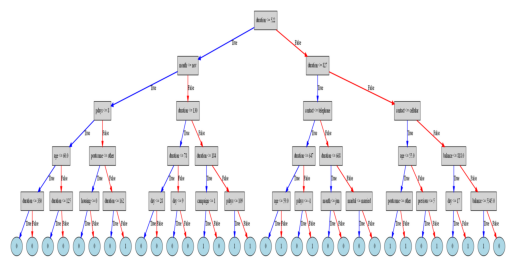

In [120]:
from PIL import Image
import matplotlib.pyplot as plt


image_path = 'decision_tree_gini.png'

image = Image.open(image_path)

desired_width = 2000
desired_height = 1000
image = image.resize((desired_width, desired_height), Image.LANCZOS)


plt.imshow(image)
plt.axis('off')  
plt.show()


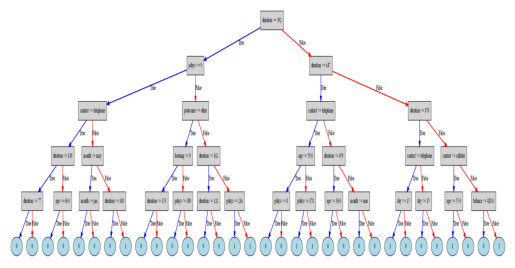

In [121]:
image_path = 'decision_tree_entropy.png'


image = Image.open(image_path)

desired_width = 2000
desired_height = 1000
image = image.resize((desired_width, desired_height), Image.LANCZOS)


plt.imshow(image)
plt.axis('off')  
plt.show()